# Module 1 - HW

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


### File paths

In [2]:
january_data_path = '../MLOps Course/Module_01/hwork/data/fhv_tripdata_2021-01.parquet'
february_data_path = '../MLOps Course/Module_01/hwork/data/fhv_tripdata_2021-02.parquet'

### Load January Data

In [3]:
data_january = pd.read_parquet(january_data_path)

In [4]:
data_january.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [5]:
data_january.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [6]:
# Check NaN values
data_january.isna().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               958267
DOlocationID               162220
SR_Flag                   1154112
Affiliated_base_number        885
dtype: int64

#### Q1 - How many records are there (data for January)

In [7]:
print(f'The dataset contains {data_january.shape[0]} records')

The dataset contains 1154112 records


#### Q2 - What's the average trip duration in January?

In [8]:
# add a column with trip duration
data_january = data_january.assign(trip_duration=lambda r: (r.dropOff_datetime - r.pickup_datetime).dt.total_seconds() / 60)

In [9]:
data_january.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,trip_duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


In [10]:
# Average trip duration in January
avg_duration = data_january.trip_duration.mean()
print(f'Average trip duration = {round(avg_duration, 2)} minuutes')


Average trip duration = 19.17 minuutes


Q3 - Check the distribution of the duration variable. There are some outliers.

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop?

In [11]:
trip_duration_stats = data_january.trip_duration.describe()
trip_duration_stats


count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: trip_duration, dtype: float64

In [12]:
# log transformation
jan_trip_duration_log = data_january.trip_duration.apply(np.log)

In [13]:
trip_duration_stats_log = jan_trip_duration_log.describe()
trip_duration_stats_log

count    1.154112e+06
mean     2.522544e+00
std      9.786258e-01
min     -4.094345e+00
25%      2.049841e+00
50%      2.595255e+00
75%      3.103839e+00
max      1.295600e+01
Name: trip_duration, dtype: float64

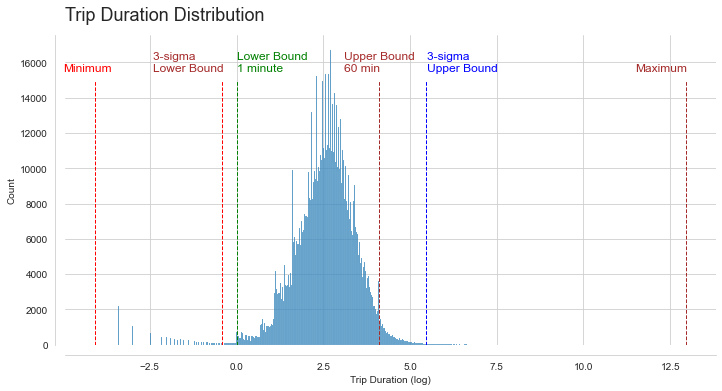

In [14]:
# distribution plot
sns.displot(x=jan_trip_duration_log, aspect=2)
plt.vlines(x=[trip_duration_stats_log.loc['min'],
              trip_duration_stats_log.loc['max'],
              np.log(1),
              jan_trip_duration_log.mean() + jan_trip_duration_log.std() * 3,
              jan_trip_duration_log.mean() - jan_trip_duration_log.std() * 3,
              np.log(60)],
           ymin=0, ymax=15000, colors=['red', 'brown', 'green', 'blue'],  linestyles='--', lw=1)
plt.text(-5, 15500, 'Minimum', fontdict={'fontsize': 12, 'color': 'red'})
plt.text(np.log(1), 15500, 'Lower Bound \n1 minute', fontdict={'fontsize': 12, 'color': 'green'})
plt.text(5.5, 15500, '3-sigma \nUpper Bound', fontdict={'fontsize': 12, 'color': 'blue'})
plt.text(11.5, 15500, 'Maximum', fontdict={'fontsize': 12, 'color': 'brown'})
plt.text(np.log(60)-1, 15500, 'Upper Bound \n60 min', fontdict={'fontsize': 12, 'color': 'brown'})
plt.text(jan_trip_duration_log.mean() - jan_trip_duration_log.std() * 3 - 2, 15500, '3-sigma \nLower Bound', fontdict={'fontsize': 12, 'color': 'brown'})

plt.xlabel('Trip Duration (log)')

plt.title('Trip Duration Distribution', pad=15, fontsize=18, loc='left')
sns.despine(offset=10)

In [15]:
# trip duration stats
data_january.trip_duration.describe().to_frame().T


,count,mean,std,min,25%,50%,75%,max
trip_duration,1154112.0,19.167224,398.692165,0.016667,7.766667,13.4,22.283333,423371.05


In [16]:
data_january_filtered = data_january.loc[lambda r: r.trip_duration.between(1, 60)]
data_january_filtered.head()


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,trip_duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000


In [17]:
dropped_records_pct = (data_january_filtered.shape[0] / data_january.shape[0]) - 1
dropped_records_abs = data_january.shape[0] - data_january_filtered.shape[0]
print(f'Dropped {dropped_records_abs} records, or approximately {round(abs(dropped_records_pct), 4) * 100}%')


Dropped 44286 records, or approximately 3.84%


#### Q3 - Missing Values

The features we'll use for our model are the pickup and dropoff location IDs.

But they have a lot of missing values there. Let's replace them with "-1"

What's the factions of missing values for the pickup location ID? (Or the fraction of "-1"s after you filled the NAs)

In [18]:
data_january_filtered.isna().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               927008
DOlocationID               147907
SR_Flag                   1109826
Affiliated_base_number        773
trip_duration                   0
dtype: int64

In [19]:
data_january_filtered.loc[:, ['PUlocationID', 'DOlocationID']] = data_january_filtered.loc[:, ['PUlocationID', 'DOlocationID']].fillna(-1)

/var/folders/_2/79v295rs0nz_cnxxdvyx3hj40000gn/T/ipykernel_22072/1209738669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_january_filtered.loc[:, ['PUlocationID', 'DOlocationID']] = data_january_filtered.loc[:, ['PUlocationID', 'DOlocationID']].fillna(-1)


In [20]:
num_of_missing_vals_pulocationid = data_january_filtered.PUlocationID.value_counts(normalize=True).loc[-1]
num_of_missing_vals_pulocationid


0.8352732770722617

In [21]:
print(f'Null values share in column PUlocationID  - {round(num_of_missing_vals_pulocationid, 4) * 100}%')

Null values share in column PUlocationID  - 83.53%


Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix? (The number of columns).

In [22]:
data_january_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            1109826 non-null  float64       
 4   DOlocationID            1109826 non-null  float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   trip_duration           1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


In [23]:
df_for_training = data_january_filtered.loc[:, ['PUlocationID', 'DOlocationID']]
df_for_training.loc[:, ['PUlocationID', 'DOlocationID']] = df_for_training.loc[:, ['PUlocationID', 'DOlocationID']].astype(str)

df_list_of_dicts = df_for_training.to_dict(orient='records')
# df_list_of_dicts

In [24]:
# vectorize dicts
dvect = DictVectorizer()

In [25]:
xtrain = dvect.fit_transform(df_list_of_dicts)

In [26]:
xtrain

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [27]:
ytrain = data_january_filtered.trip_duration.values

In [28]:
ytrain[:3]

array([17.        , 17.        ,  8.28333333])

### Model training

#### Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters
Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [29]:
lin_reg = LinearRegression()

In [30]:
lin_reg.fit(xtrain, ytrain)

LinearRegression()

In [31]:
ypred = lin_reg.predict(xtrain)
rmse = mean_squared_error(ytrain, ypred, squared=False)

print(f'RMSE on training data = {rmse}')

RMSE on training data = 10.528519419910545


#### Q6. Evaluating the model

What's the RMSE on validation?

In [32]:
# evaluate the model on Feb data
february_data = pd.read_parquet(february_data_path)
february_data.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037


In [33]:
# add trip duration column
february_data = february_data.assign(trip_duration=lambda r: (r.dropOff_datetime - r.pickup_datetime).dt.total_seconds() / 60)
february_data

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,trip_duration
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014,92.000000
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037,13.800000
...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,NaN,31.0,None,B01717,13.533333
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,NaN,169.0,None,B01717,11.466667
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,None,B03285,25.383333
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,None,B03285,18.050000


In [34]:
# filter durations
february_data_filtered = february_data.loc[lambda r: r.trip_duration.between(1, 60)]

In [35]:
# make test data
february_data_test = february_data_filtered.loc[:, ['PUlocationID', 'DOlocationID']]
february_data_test.loc[:, ['PUlocationID', 'DOlocationID']] = february_data_test.loc[:, ['PUlocationID', 'DOlocationID']].astype(str)


In [36]:
# convert data to list of dicts
february_data_dicts = february_data_test.loc[:, ['PUlocationID', 'DOlocationID']].to_dict(orient='records')


In [37]:
# test and validation
xtest = dvect.transform(february_data_dicts)
ytest = february_data_filtered.trip_duration.values


In [38]:
# make prediction for February
february_prediction = lin_reg.predict(xtest)


In [39]:
# evaluate RMSE
february_rmse = mean_squared_error(ytest, february_prediction, squared=False)
print(f'RMSE on validation data is {february_rmse}')


RMSE on validation data is 11.364097859567611
